<a href="https://colab.research.google.com/github/thgusk/svm_model-handSign-dataset/blob/branch_colab/SVM_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import random

SEED=12
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

from google.colab import drive,files 
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
drive_path = "/gdrive/My Drive/"
train = pd.read_csv(drive_path + "handSign_dataset/sign_mnist_train.csv")
test = pd.read_csv(drive_path + "handSign_dataset/sign_mnist_test.csv")
print(train.shape,test.shape)

(27455, 785) (7172, 785)


In [ ]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [ ]:
train_images = train.loc[:,'pixel1':].values.reshape(-1,28,28)
train_images.shape

(27455, 28, 28)

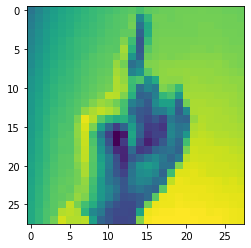

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0]);

In [ ]:
y_train = train.loc[:,'label']
y_train.unique()

array([ 3,  6,  2, 13, 16,  8, 22, 18, 10, 20, 17, 19, 21, 23, 24,  1, 12,
       11, 15,  4,  0,  5,  7, 14])

In [ ]:
y_test = test.loc[:,'label']
y_test.unique()

array([ 6,  5, 10,  0,  3, 21, 14,  7,  8, 12,  4, 22,  2, 15,  1, 13, 19,
       18, 23, 17, 20, 16, 11, 24])

In [ ]:
target_values = {0:'A',
                 1:'B',
                 2:'C',
                 3:'D',
                 4:'E',
                 5:'F',
                 6:'G',
                 7:'H',
                 8:'I',
                 10:'K',
                 11:'L',
                 12:'M',
                 13:'N',
                 14:'O',
                 15:'P',
                 16:'Q',
                 17:'R',
                 18:'S',
                 19:'T',
                 20:'U',
                 21:'V',
                 22:'W',
                 23:'X',
                 24:'Y'}
print(y_train[0]);
print(target_values[y_train[0]])

3
D


In [ ]:
test_images = test.loc[:,'pixel1':].values.reshape(-1,28,28)
test_images.shape

(7172, 28, 28)

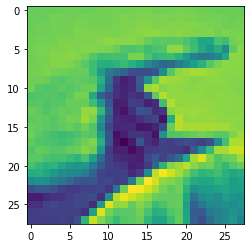

In [ ]:
plt.imshow(test_images[0])

In [ ]:
#피처 스케일 맞추기
x_train = train_images/255
x_test = test_images/255

In [ ]:
#채널 차원 추가
x_train = np.expand_dims(x_train,axis=-1)  
x_test = np.expand_dims(x_test,axis=-1)

x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

In [ ]:
from sklearn import svm

#svm 분류모델 SVC학습
s = svm.SVC(gamma=0.01,C=100)
s.fit(x_train, y_train)

res = s.predict(x_test)

In [ ]:
#혼동 행렬 
conf=np.zeros((25,25))
for i in range(len(res)):
  conf[res[i]][y_test[i]]+=1
print(conf)

[[331.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  18.  22.
    0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0. 423.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0. 305.   0.   0.  21.   0.   0.   0.   0.   0.  15.   0.   3.
   22.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0. 245.   0.   0.   0.   0.   0.   0.   0.   0.   0.   6.
    0.   0.   0.   0.   0.   1.   1.   0.   0.   0.   0.]
 [  0.   0.   0.   0. 498.   0.   0.   0.   0.   0.   0.   0.  18.   0.
    0.   0.   0.   0.  21.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   5.   0.   0. 205.   0.   0.   0.   0.   1.   4.   0.  16.
    0.   0.   0.   0.   0.   2.   0.  20.   0.   9.   0.]
 [  0.   0.   0.   0.   0.   0. 311.  21.   0.   0.   0.   0.   0.   0.
   11.   0.   0.   0.   0.   2.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.  13. 393.   0.   0.   0.   0.   0.   0.
    0.   0.   0.  

In [ ]:
#정확률 측정하고 출력
no_correct=0
for i in range(25):
  no_correct+=conf[i][i]
accuracy=no_correct/len(res)
print("테스트 집합에 대한 정확률 --> ",accuracy*100,"%")

테스트 집합에 대한 정확률 -->  81.62297824874511 %
